In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
df = pd.read_csv('tmdb.csv')

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df.dropna(subset=['revenue_adj'], inplace=True)
df = df[df['revenue_adj'] > 0]
df.shape

(4850, 21)

revenue_adj is the column where the revenue of the perticular movie is adjusted as per the latest movie in the dataset (by considering the inflation and costs)

In [3]:
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       5
homepage                3185
director                   1
tagline                  464
keywords                 235
overview                   0
runtime                    0
genres                     0
production_companies      96
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
df.drop(['id', 'imdb_id', 'homepage'], axis=1, inplace=True)
df.dropna(subset=['production_companies', 'keywords', 'tagline'], inplace=True)

In [5]:
df.shape

(4178, 18)

In [6]:
new_df = df.copy()
print(new_df.shape)

(4178, 18)


here i am taking Textblob for the sentiment analysis as it's give scale rating for the text from negetive to positive

In [7]:
from textblob import TextBlob

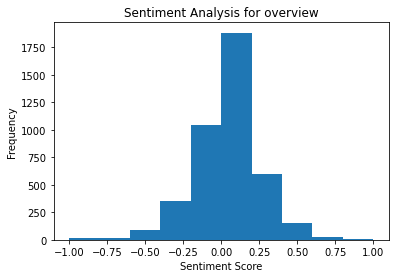

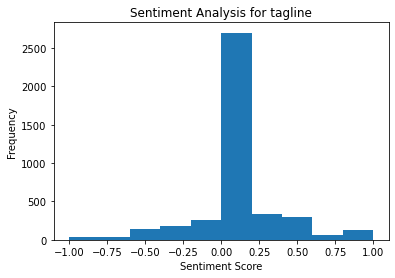

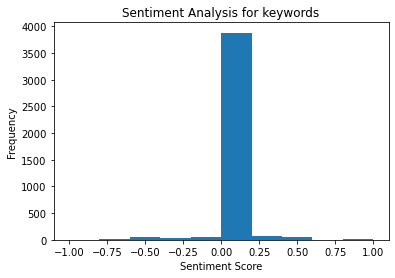

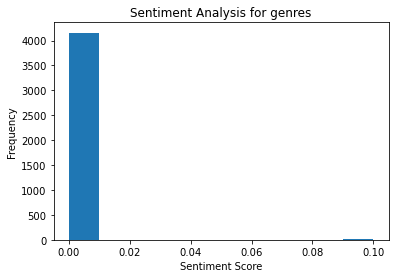

In [8]:
import matplotlib.pyplot as plt

def clean_text(text):
    cleaned_text = str(text).replace('[^a-zA-Z\s]', '').lower().strip()
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

columns_to_clean = ['overview', 'tagline', 'keywords', 'genres']
for column in columns_to_clean:
   new_df[column + '_clean'] = new_df[column].apply(clean_text)


def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

for column in columns_to_clean:
    new_df[column + '_sentiment_score'] = new_df[column + '_clean'].apply(calculate_sentiment)

for column in columns_to_clean:
    plt.hist(new_df[column + '_sentiment_score'], bins=10)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title(f'Sentiment Analysis for {column}')
    plt.show()


In [9]:
#sentiment analysis score for overview ,tagline, keywords and genres
def clean_text(text):
    cleaned_text = str(text).replace('[^a-zA-Z\s]', '').lower().strip()
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

columns_to_clean = ['overview', 'tagline', 'keywords',  'genres']
for column in columns_to_clean:
    df[column + '_clean'] = df[column].apply(clean_text)

def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

for column in columns_to_clean:
    df[column + '_sentiment_score'] = df[column + '_clean'].apply(calculate_sentiment)

for column in columns_to_clean:
    print(f"Sentiment analysis scores for {column}:")
    print(df[column + '_sentiment_score'])
    print()

Sentiment analysis scores for overview:
0        0.375000
1        0.044444
2        0.100000
3       -0.431818
4        0.000000
           ...   
10822    0.245170
10828    0.000000
10829    0.100000
10835   -0.050000
10848   -0.175000
Name: overview_sentiment_score, Length: 4178, dtype: float64

Sentiment analysis scores for tagline:
0        0.000000
1        0.500000
2       -0.200000
3        0.000000
4        0.000000
           ...   
10822    0.300000
10828    0.000000
10829    0.000000
10835    0.700000
10848    0.333333
Name: tagline_sentiment_score, Length: 4178, dtype: float64

Sentiment analysis scores for keywords:
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10822    0.0
10828   -0.6
10829    0.0
10835    0.0
10848    0.0
Name: keywords_sentiment_score, Length: 4178, dtype: float64

Sentiment analysis scores for genres:
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10822    0.0
10828    0.0
10829    0.0
10

In [10]:
#combined sentiment score for the all the above 
def clean_text(text):
    cleaned_text = str(text).replace('[^a-zA-Z\s]', '').lower().strip()
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

columns_to_clean = ['overview', 'tagline', 'keywords', 'genres']
for column in columns_to_clean:
    new_df[column + '_clean'] = new_df[column].apply(clean_text)

def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

for column in columns_to_clean:
    new_df[column + '_sentiment_score'] = new_df[column + '_clean'].apply(calculate_sentiment)

new_df['combined_sentiment_score'] = new_df[[column + '_sentiment_score' for column in columns_to_clean]].mean(axis=1)

print("Combined sentiment analysis:")
print(new_df['combined_sentiment_score'])


Combined sentiment analysis:
0        0.093750
1        0.136111
2       -0.025000
3       -0.107955
4        0.000000
           ...   
10822    0.136293
10828   -0.150000
10829    0.025000
10835    0.162500
10848    0.039583
Name: combined_sentiment_score, Length: 4178, dtype: float64


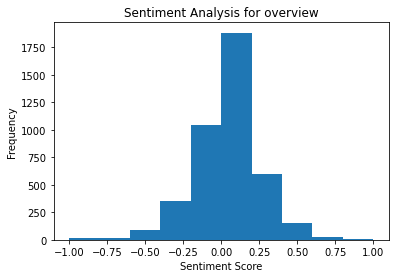

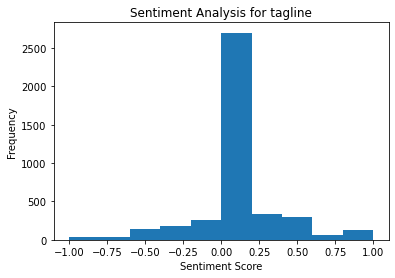

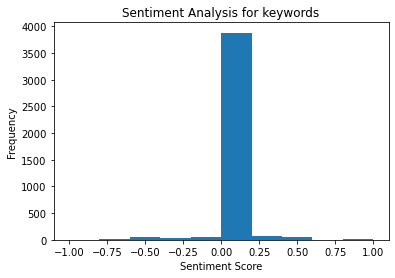

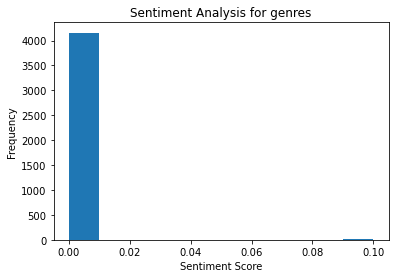

Analysis of Neutral Sentiment:
Percentage of neutral sentiment in overview: 8.81%
Percentage of neutral sentiment in tagline: 53.90%
Percentage of neutral sentiment in keywords: 89.40%
Percentage of neutral sentiment in genres: 99.52%


In [11]:
#visualised images for the sentiment score
def clean_text(text):
    cleaned_text = str(text).replace('[^a-zA-Z\s]', '').lower().strip()
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

columns_to_clean = ['overview', 'tagline', 'keywords', 'genres']
for column in columns_to_clean:
    new_df[column + '_clean'] = new_df[column].apply(clean_text)

def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

for column in columns_to_clean:
    new_df[column + '_sentiment_score'] = new_df[column + '_clean'].apply(calculate_sentiment)

for column in columns_to_clean:
    plt.hist(new_df[column + '_sentiment_score'], bins=10)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title(f'Sentiment Analysis for {column}')
    plt.show()

print("Analysis of Neutral Sentiment:")
for column in columns_to_clean:
    neutral_count = new_df[new_df[column + '_sentiment_score'] == 0].shape[0]
    total_count = new_df.shape[0]
    neutral_percentage = (neutral_count / total_count) * 100
    print(f"Percentage of neutral sentiment in {column}: {neutral_percentage:.2f}%")

categorising the sentiment scores into 7 types from the scale -1 to 1 as
    'Extremely Negative': (-1, -0.75),
    'Very Negative': (-0.75, -0.5),
    'Negative': (-0.5, -0.25),
    'Neutral': (-0.25, 0.25),
    'Positive': (0.25, 0.5),
    'Very Positive': (0.5, 0.75),
    'Extremely Positive':(0.75,1).

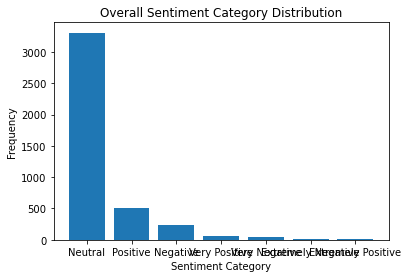

Overall Sentiment Category Distribution:
Neutral               3306
Positive               512
Negative               240
Very Positive           63
Very Negative           37
Extremely Negative      12
Extremely Positive       8
Name: count, dtype: int64

Percentage of neutral sentiment across all columns: 79.13%


In [12]:
from textblob import TextBlob

combined_text = new_df['overview_clean'] + ' ' + new_df['tagline_clean'] + ' ' + \
                new_df['keywords_clean'] + ' ' + new_df['genres_clean']


sentiment_scores = combined_text.apply(lambda x: TextBlob(x).sentiment.polarity)

sentiment_categories = {
    'Extremely Negative': (-1, -0.75),
    'Very Negative': (-0.75, -0.5),
    'Negative': (-0.5, -0.25),
    'Neutral': (-0.25, 0.25),
    'Positive': (0.25, 0.5),
    'Very Positive': (0.5, 0.75),
    'Extremely Positive': (0.75, 1)
}

def categorize_sentiment(score):
    for category, (min_score, max_score) in sentiment_categories.items():
        if min_score <= score <= max_score:
            return category
    return 'Unknown'

sentiment_categories_combined = sentiment_scores.apply(categorize_sentiment)

plt.bar(sentiment_categories_combined.value_counts().index, sentiment_categories_combined.value_counts())
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Overall Sentiment Category Distribution')
plt.show()

print("Overall Sentiment Category Distribution:")
print(sentiment_categories_combined.value_counts())

neutral_count = sentiment_categories_combined.value_counts().get('Neutral', 0)
total_count = len(sentiment_categories_combined)
neutral_percentage = (neutral_count / total_count) * 100
print(f"\nPercentage of neutral sentiment across all columns: {neutral_percentage:.2f}%")


as the nuetral part getting comparetively more range of values so the movies lies under this renge is also more.
so there will be  small changes in the scales of sentiment score.

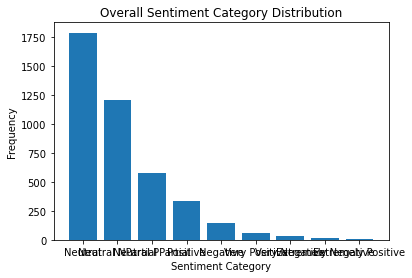

Overall Sentiment Category Distribution:
Neutral               1789
Neutral NPartial      1208
Neutral PPartial       581
Positive               338
Negative               142
Very Positive           63
Very Negative           37
Extremely Negative      12
Extremely Positive       8
Name: count, dtype: int64

Percentage of neutral sentiment across all columns: 42.82%


In [13]:
from textblob import TextBlob

combined_text = new_df['overview_clean'] + ' ' + new_df['tagline_clean'] + ' ' + \
                new_df['keywords_clean'] + ' ' + new_df['genres_clean']

sentiment_scores = combined_text.apply(lambda x: TextBlob(x).sentiment.polarity)

sentiment_categories = {
    'Extremely Negative': (-1, -0.75),
    'Very Negative': (-0.75, -0.5),
    'Negative': (-0.5, -0.3),
    'Neutral': (-0.1, 0.1),
    'Neutral PPartial': (-0.3, -0.1),
    'Neutral NPartial': (0.1, 0.3),
    'Positive': (0.3, 0.5),
    'Very Positive': (0.5, 0.75),
    'Extremely Positive': (0.75, 1)
}

def categorize_sentiment(score):
    for category, (min_score, max_score) in sentiment_categories.items():
        if min_score <= score <= max_score:
            return category
    return 'Unknown'

sentiment_categories_combined = sentiment_scores.apply(categorize_sentiment)

plt.bar(sentiment_categories_combined.value_counts().index, sentiment_categories_combined.value_counts())
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Overall Sentiment Category Distribution')
plt.show()

print("Overall Sentiment Category Distribution:")
print(sentiment_categories_combined.value_counts())

neutral_count = sentiment_categories_combined.value_counts().get('Neutral', 0)
partial_neutral_count = sentiment_categories_combined.value_counts().get('Neutral Partial', 0)
total_count = len(sentiment_categories_combined)
neutral_percentage = ((neutral_count + partial_neutral_count) / total_count) * 100
print(f"\nPercentage of neutral sentiment across all columns: {neutral_percentage:.2f}%")


In [14]:
#checking the new columns were inserted or not
new_df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'overview_clean',
       'tagline_clean', 'keywords_clean', 'genres_clean',
       'overview_sentiment_score', 'tagline_sentiment_score',
       'keywords_sentiment_score', 'genres_sentiment_score',
       'combined_sentiment_score'],
      dtype='object')

In [15]:
print(new_df)

       popularity     budget     revenue                   original_title  \
0       32.985763  150000000  1513528810                   Jurassic World   
1       28.419936  150000000   378436354               Mad Max: Fury Road   
2       13.112507  110000000   295238201                        Insurgent   
3       11.173104  200000000  2068178225     Star Wars: The Force Awakens   
4        9.335014  190000000  1506249360                        Furious 7   
...           ...        ...         ...                              ...   
10822    0.670274    7500000    33736689  Who's Afraid of Virginia Woolf?   
10828    0.402730    3000000    13000000                     Torn Curtain   
10829    0.395668    4653000     6000000                        El Dorado   
10835    0.299911   12000000    20000000                 The Sand Pebbles   
10848    0.207257    5115000    12000000                 Fantastic Voyage   

                                                    cast           director

droping the unnecessary columns.

In [16]:
df1 = new_df.drop(columns=['overview_clean', 'tagline_clean', 'keywords_clean', 'genres_clean'])

df1.head(4)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,overview_sentiment_score,tagline_sentiment_score,keywords_sentiment_score,genres_sentiment_score,combined_sentiment_score
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,...,5562,6.5,2015,137999939.3,1.392446e+09,0.375000,0.0,0.0,0.0,0.093750
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,...,6185,7.1,2015,137999939.3,3.481613e+08,0.044444,0.5,0.0,0.0,0.136111
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,...,2480,6.3,2015,101199955.5,2.716190e+08,0.100000,-0.2,0.0,0.0,-0.025000
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,...,5292,7.5,2015,183999919.0,1.902723e+09,-0.431818,0.0,0.0,0.0,-0.107955


In [17]:
columns_to_drop = [ 'overview', 'tagline', 'keywords', 'genres']
df2 = df1.drop(columns=columns_to_drop)

df2.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,overview_sentiment_score,tagline_sentiment_score,keywords_sentiment_score,genres_sentiment_score,combined_sentiment_score
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,0.375000,0.0,0.0,0.0,0.093750
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,0.044444,0.5,0.0,0.0,0.136111


categorizing the sentiment scores.

In [18]:
def categorize_sentiment(score):
    if score <= -0.75:
        return 'Extremely Negative'
    elif -0.75 < score <= -0.5:
        return 'Very Negative'
    elif -0.5 < score <= -0.3:
        return 'Negative'
    elif -0.3 < score <= 0.1:
        return 'Neutral PPartial'
    elif 0.1 < score <= 0.3:
        return 'Neutral NPartial'
    elif 0.3 < score <= 0.5:
        return 'Positive'
    elif 0.5 < score <= 0.75:
        return 'Very Positive'
    else:
        return 'Extremely Positive'

df2['sentiment'] = df2['combined_sentiment_score'].apply(categorize_sentiment)

df2.head(4)

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,overview_sentiment_score,tagline_sentiment_score,keywords_sentiment_score,genres_sentiment_score,combined_sentiment_score,sentiment
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,0.375000,0.0,0.0,0.0,0.093750,Neutral PPartial
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,0.044444,0.5,0.0,0.0,0.136111,Neutral NPartial
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,0.100000,-0.2,0.0,0.0,-0.025000,Neutral PPartial
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,-0.431818,0.0,0.0,0.0,-0.107955,Neutral PPartial


as the movie release time also effects the revenue so it is divided into seasons and months

In [19]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df2['release_month'] = pd.to_datetime(df2['release_date']).dt.month

df2['season'] = df2['release_month'].apply(get_season)

df2.drop(columns=['release_month'], inplace=True)

df2.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,...,release_year,budget_adj,revenue_adj,overview_sentiment_score,tagline_sentiment_score,keywords_sentiment_score,genres_sentiment_score,combined_sentiment_score,sentiment,season
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,...,2015,137999939.3,1.392446e+09,0.375000,0.0,0.0,0.0,0.093750,Neutral PPartial,Summer
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,...,2015,137999939.3,3.481613e+08,0.044444,0.5,0.0,0.0,0.136111,Neutral NPartial,Spring


In [20]:
pip install statsmodels --upgrade


Note: you may need to restart the kernel to use updated packages.


In [21]:
df3=df2

building the model for analysing the revenues

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


features = ['popularity', 'budget_adj','revenue','budget', 'runtime', 'release_year', 'vote_count', 
            'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
            'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score',
            'season', 'cast', 'director', 'production_companies']
target = 'revenue_adj'


X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.2, random_state=42)


categorical_features = ['season', 'cast', 'director', 'production_companies']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_features = ['popularity', 'budget_adj','revenue','budget', 'runtime', 'release_year', 'vote_count', 
                    'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
                    'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score']
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])


svr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])


rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_cv_score = cross_val_score(rf_model, df3[features], df3[target], cv=5, scoring='r2').mean()

gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_cv_score = cross_val_score(gb_model, df3[features], df3[target], cv=5, scoring='r2').mean()


svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_cv_score = cross_val_score(svr_model, df3[features], df3[target], cv=5, scoring='r2').mean()

print("Random Forest Regressor:")
print("Mean Squared Error:", rf_mse)
print("R^2 Score:", rf_r2)
print("Mean Cross-Validation R^2 Score:", rf_cv_score)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error:", gb_mse)
print("R^2 Score:", gb_r2)
print("Mean Cross-Validation R^2 Score:", gb_cv_score)

print("\nSupport Vector Regressor:")
print("Mean Squared Error:", svr_mse)
print("R^2 Score:", svr_r2)
print("Mean Cross-Validation R^2 Score:", svr_cv_score)

sample_indices = [10, 20, 30]  
sample_X = X_test.iloc[sample_indices]
sample_y_actual = y_test.iloc[sample_indices]


rf_sample_y_pred = rf_model.predict(sample_X)


gb_sample_y_pred = gb_model.predict(sample_X)

svr_sample_y_pred = svr_model.predict(sample_X)

sample_predictions_df = pd.DataFrame({
    'Original Revenue': sample_y_actual.values,
    'RF Predicted Revenue': rf_sample_y_pred,
    'GB Predicted Revenue': gb_sample_y_pred,
    'SVR Predicted Revenue': svr_sample_y_pred
}, index=sample_X.index)

print("\nSample Predictions:")
print(sample_predictions_df)


Random Forest Regressor:
Mean Squared Error: 2868764818803777.0
R^2 Score: 0.9347745825061233
Mean Cross-Validation R^2 Score: 0.931367329292162

Gradient Boosting Regressor:
Mean Squared Error: 1750320053814166.0
R^2 Score: 0.960204002952902
Mean Cross-Validation R^2 Score: 0.9561711697610621

Support Vector Regressor:
Mean Squared Error: 4.896664384904096e+16
R^2 Score: -0.11332576563716112
Mean Cross-Validation R^2 Score: -0.1275431295616393

Sample Predictions:
      Original Revenue  RF Predicted Revenue  GB Predicted Revenue  \
8944      3.615428e+01          3.758293e+03          1.304902e+07   
4704      2.177764e+04          2.144458e+04         -1.389167e+06   
6585      3.665686e+07          3.605269e+07          4.191838e+07   

      SVR Predicted Revenue  
8944           5.577020e+07  
4704           5.577009e+07  
6585           5.577023e+07  


best model for the revenue prediction

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['popularity', 'budget_adj','revenue','budget', 'runtime', 'release_year', 'vote_count', 
            'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
            'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score',
            'season', 'cast', 'director', 'production_companies']
target = 'revenue_adj'

X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.2, random_state=42)

categorical_features = ['season', 'cast', 'director', 'production_companies']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numeric_features = ['popularity', 'budget_adj','revenue','budget', 'runtime', 'release_year', 'vote_count', 
                    'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
                    'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

cv_score = cross_val_score(model, df3[features], df3[target], cv=5, scoring='r2').mean()
print("Mean Cross-Validation R^2 Score:", cv_score)

predictions_df = pd.DataFrame({
    'original_title': X_test.index,  
    'predicted_revenue': y_pred,
    'actual_revenue': y_test.values  
})

print(predictions_df[['original_title', 'predicted_revenue', 'actual_revenue']])

Mean Squared Error: 2868764818803777.0
R^2 Score: 0.9347745825061233
Mean Cross-Validation R^2 Score: 0.931367329292162
     original_title  predicted_revenue  actual_revenue
0              4177       3.146046e+08    3.147131e+08
1              5600       5.416370e+05    4.900238e+05
2              2022       1.761664e+08    1.775120e+08
3              6279       1.220030e+08    1.206415e+08
4              2947       4.383840e+07    4.404925e+07
..              ...                ...             ...
831            7054       6.695114e+07    6.606186e+07
832           10760       5.338713e+08    4.713208e+08
833            4376       5.642797e+08    5.217594e+08
834            3457       1.087639e+08    1.068337e+08
835            6197       1.174505e+08    1.166568e+08

[836 rows x 3 columns]


In [24]:
import pandas as pd

numeric_features = ['popularity', 'budget_adj', 'revenue', 'budget', 'runtime', 'release_year', 'vote_count', 
                    'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
                    'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score']
target = 'revenue_adj'

data = df3[numeric_features + [target]]

correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                          popularity  budget_adj   revenue    budget  \
popularity                  1.000000    0.424457  0.620638  0.467357   
budget_adj                  0.424457    1.000000  0.668904  0.962994   
revenue                     0.620638    0.668904  1.000000  0.698569   
budget                      0.467357    0.962994  0.698569  1.000000   
runtime                     0.209335    0.313757  0.247844  0.254088   
release_year                0.194724    0.123361  0.150728  0.280751   
vote_count                  0.783102    0.525190  0.760201  0.579269   
vote_average                0.305313    0.053178  0.221470  0.041125   
combined_sentiment_score   -0.024712   -0.032552 -0.019235 -0.032075   
overview_sentiment_score   -0.003263   -0.015968 -0.003663 -0.012077   
tagline_sentiment_score    -0.023716   -0.030335 -0.024809 -0.035182   
keywords_sentiment_score   -0.020209   -0.008822  0.002013 -0.002777   
genres_sentiment_score     -0.001766    0.03

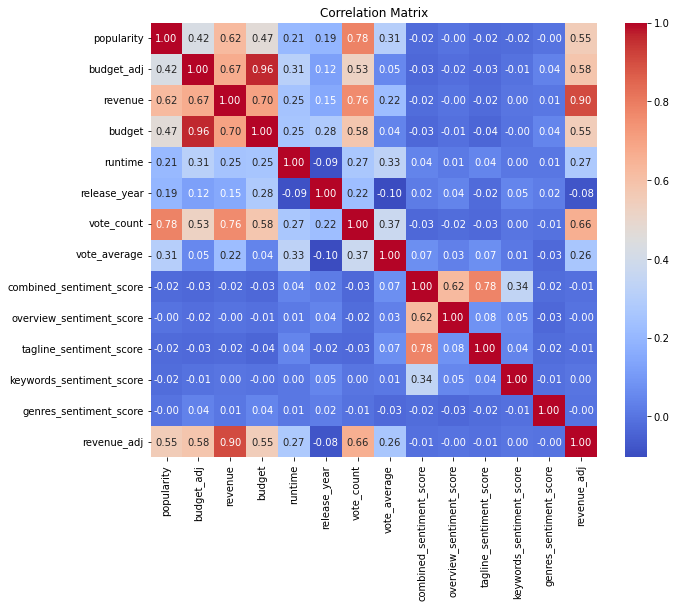

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['popularity', 'budget_adj', 'revenue', 'budget', 'runtime', 'release_year', 'vote_count', 
                    'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
                    'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score']
target = 'revenue_adj'


data = df3[numeric_features + [target]]
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [26]:
import pingouin as pg

features = ['popularity', 'budget_adj', 'revenue', 'budget', 'runtime', 'release_year', 'vote_count', 
            'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
            'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score'
             ]
target = 'revenue_adj'

data = df3[features + [target]]

correlation_matrix = data.corr()

helpful_variables = correlation_matrix[target][abs(correlation_matrix[target]) > 0.5].index.tolist()

partial_corr_coeffs = {}
for feature in helpful_variables:
    if feature != target:
        # Filter only numeric columns for partial correlation computation
        numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
        partial_corr = pg.partial_corr(data=data, x=feature, y=target, covar=[col for col in numeric_columns if col not in [feature, target]])
        partial_corr_coeffs[feature] = partial_corr

print("Partial Correlation Coefficients:")
for feature, partial_corr in partial_corr_coeffs.items():
    print(f"{feature}: {partial_corr['r'][0]:.4f} (p-value: {partial_corr['p-val'][0]:.4f})")


Partial Correlation Coefficients:
popularity: -0.2466 (p-value: 0.0000)
budget_adj: 0.3450 (p-value: 0.0000)
revenue: 0.8521 (p-value: 0.0000)
budget: -0.3779 (p-value: 0.0000)
vote_count: 0.0417 (p-value: 0.0070)


C:\Users\DELL\AppData\Local\Temp/ipykernel_2208/738352864.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{feature}: {partial_corr['r'][0]:.4f} (p-value: {partial_corr['p-val'][0]:.4f})")


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

features = ['popularity', 'budget_adj', 'revenue', 'budget', 'runtime', 'release_year', 'vote_count', 
            'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
            'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score',
            'season', 'cast', 'director', 'production_companies']
target = 'revenue_adj'

X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.2, random_state=42)
categorical_features = ['season', 'cast', 'director', 'production_companies']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_features = ['popularity', 'budget_adj', 'revenue', 'budget', 'runtime', 'release_year', 'vote_count', 
                    'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
                    'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score']
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

importances = model.named_steps['regressor'].feature_importances_

categorical_names = list(model.named_steps['preprocessor'].named_transformers_['cat'].categories_)

all_feature_names = numeric_features + [f"{cat}_{val}" for cat, vals in zip(categorical_features, categorical_names) for val in vals]
feature_importances = pd.DataFrame(data=importances, index=all_feature_names, columns=['Importance'])

overall_importance = feature_importances.groupby(level=0).sum()

overall_importance = overall_importance.sort_values(by='Importance', ascending=False)
print("Overall Importance of Variables in Predicting revenue_adj:")
print(overall_importance)


Overall Importance of Variables in Predicting revenue_adj:
                                                    Importance
revenue                                               0.839333
release_year                                          0.123848
director_James Cameron                                0.007192
budget                                                0.007115
runtime                                               0.003043
...                                                        ...
cast_George O'Hanlon|Mel Blanc|Penny Singleton|...    0.000000
director_Kevin Macdonald|Zillah Bowes                 0.000000
cast_Clint Eastwood|Jeff Daniels|Anjelica Husto...    0.000000
cast_Kate Capshaw|Lea Thompson|Kelly Preston|La...    0.000000
production_companies_20th Century Fox|Baltimore...    0.000000

[7560 rows x 1 columns]


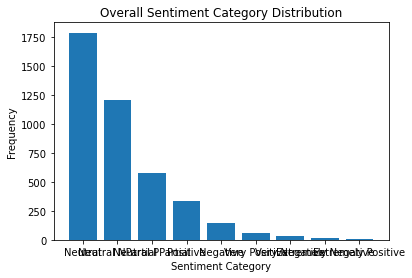

Overall Sentiment Category Distribution:
Neutral               1789
Neutral NPartial      1208
Neutral PPartial       581
Positive               338
Negative               142
Very Positive           63
Very Negative           37
Extremely Negative      12
Extremely Positive       8
Name: count, dtype: int64


In [28]:
plt.bar(sentiment_categories_combined.value_counts().index, sentiment_categories_combined.value_counts())
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Overall Sentiment Category Distribution')
plt.show()

print("Overall Sentiment Category Distribution:")
print(sentiment_categories_combined.value_counts())


visualising the predicted and real revenues 

Mean Squared Error: 2868764818803777.0
R^2 Score: 0.9347745825061233


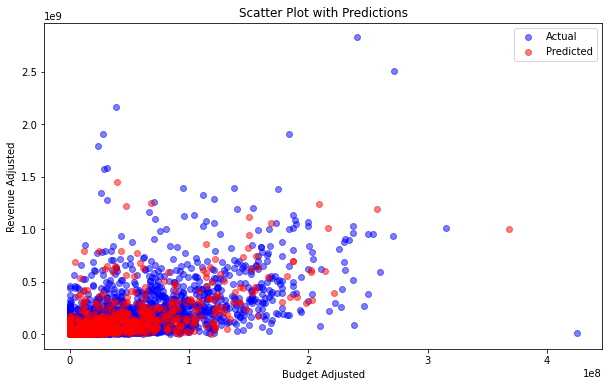

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['popularity', 'budget_adj', 'revenue', 'budget', 'runtime', 'release_year', 'vote_count', 
            'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
            'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score',
            'season', 'cast', 'director', 'production_companies']
target = 'revenue_adj'

X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.2, random_state=42)

categorical_features = ['season', 'cast', 'director', 'production_companies']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numeric_features = ['popularity', 'budget_adj', 'revenue', 'budget', 'runtime', 'release_year', 'vote_count', 
                    'vote_average', 'combined_sentiment_score', 'overview_sentiment_score',
                    'tagline_sentiment_score', 'keywords_sentiment_score', 'genres_sentiment_score']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(X_train['budget_adj'], y_train, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['budget_adj'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Budget Adjusted')
plt.ylabel('Revenue Adjusted')
plt.title('Scatter Plot with Predictions')
plt.legend()
plt.show()


C:\Users\DELL\AppData\Local\Temp/ipykernel_2208/3970488061.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(list(partial_corr_coeffs.keys()), [pcorr['r'][0] for pcorr in partial_corr_coeffs.values()], color='skyblue')


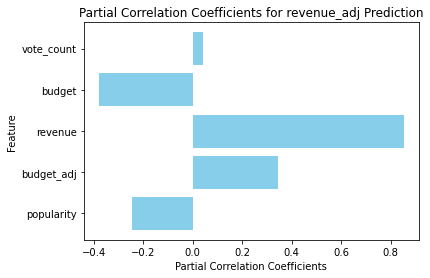

In [30]:
import matplotlib.pyplot as plt

plt.barh(list(partial_corr_coeffs.keys()), [pcorr['r'][0] for pcorr in partial_corr_coeffs.values()], color='skyblue')
plt.xlabel('Partial Correlation Coefficients')
plt.ylabel('Feature')
plt.title('Partial Correlation Coefficients for revenue_adj Prediction')
plt.show()


residualplot for the checking the models prediction is good or bad

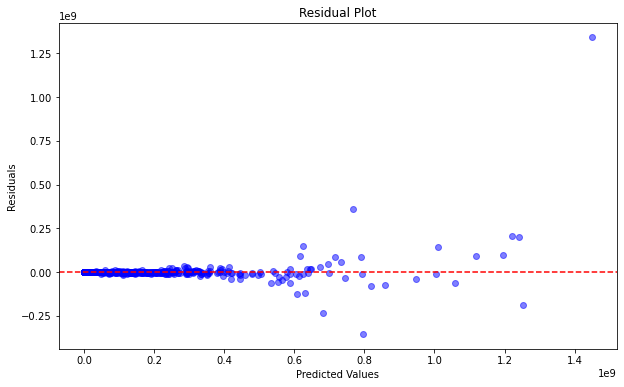

In [31]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


C:\Users\DELL\AppData\Local\Temp/ipykernel_2208/1611164063.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 720x432 with 0 Axes>

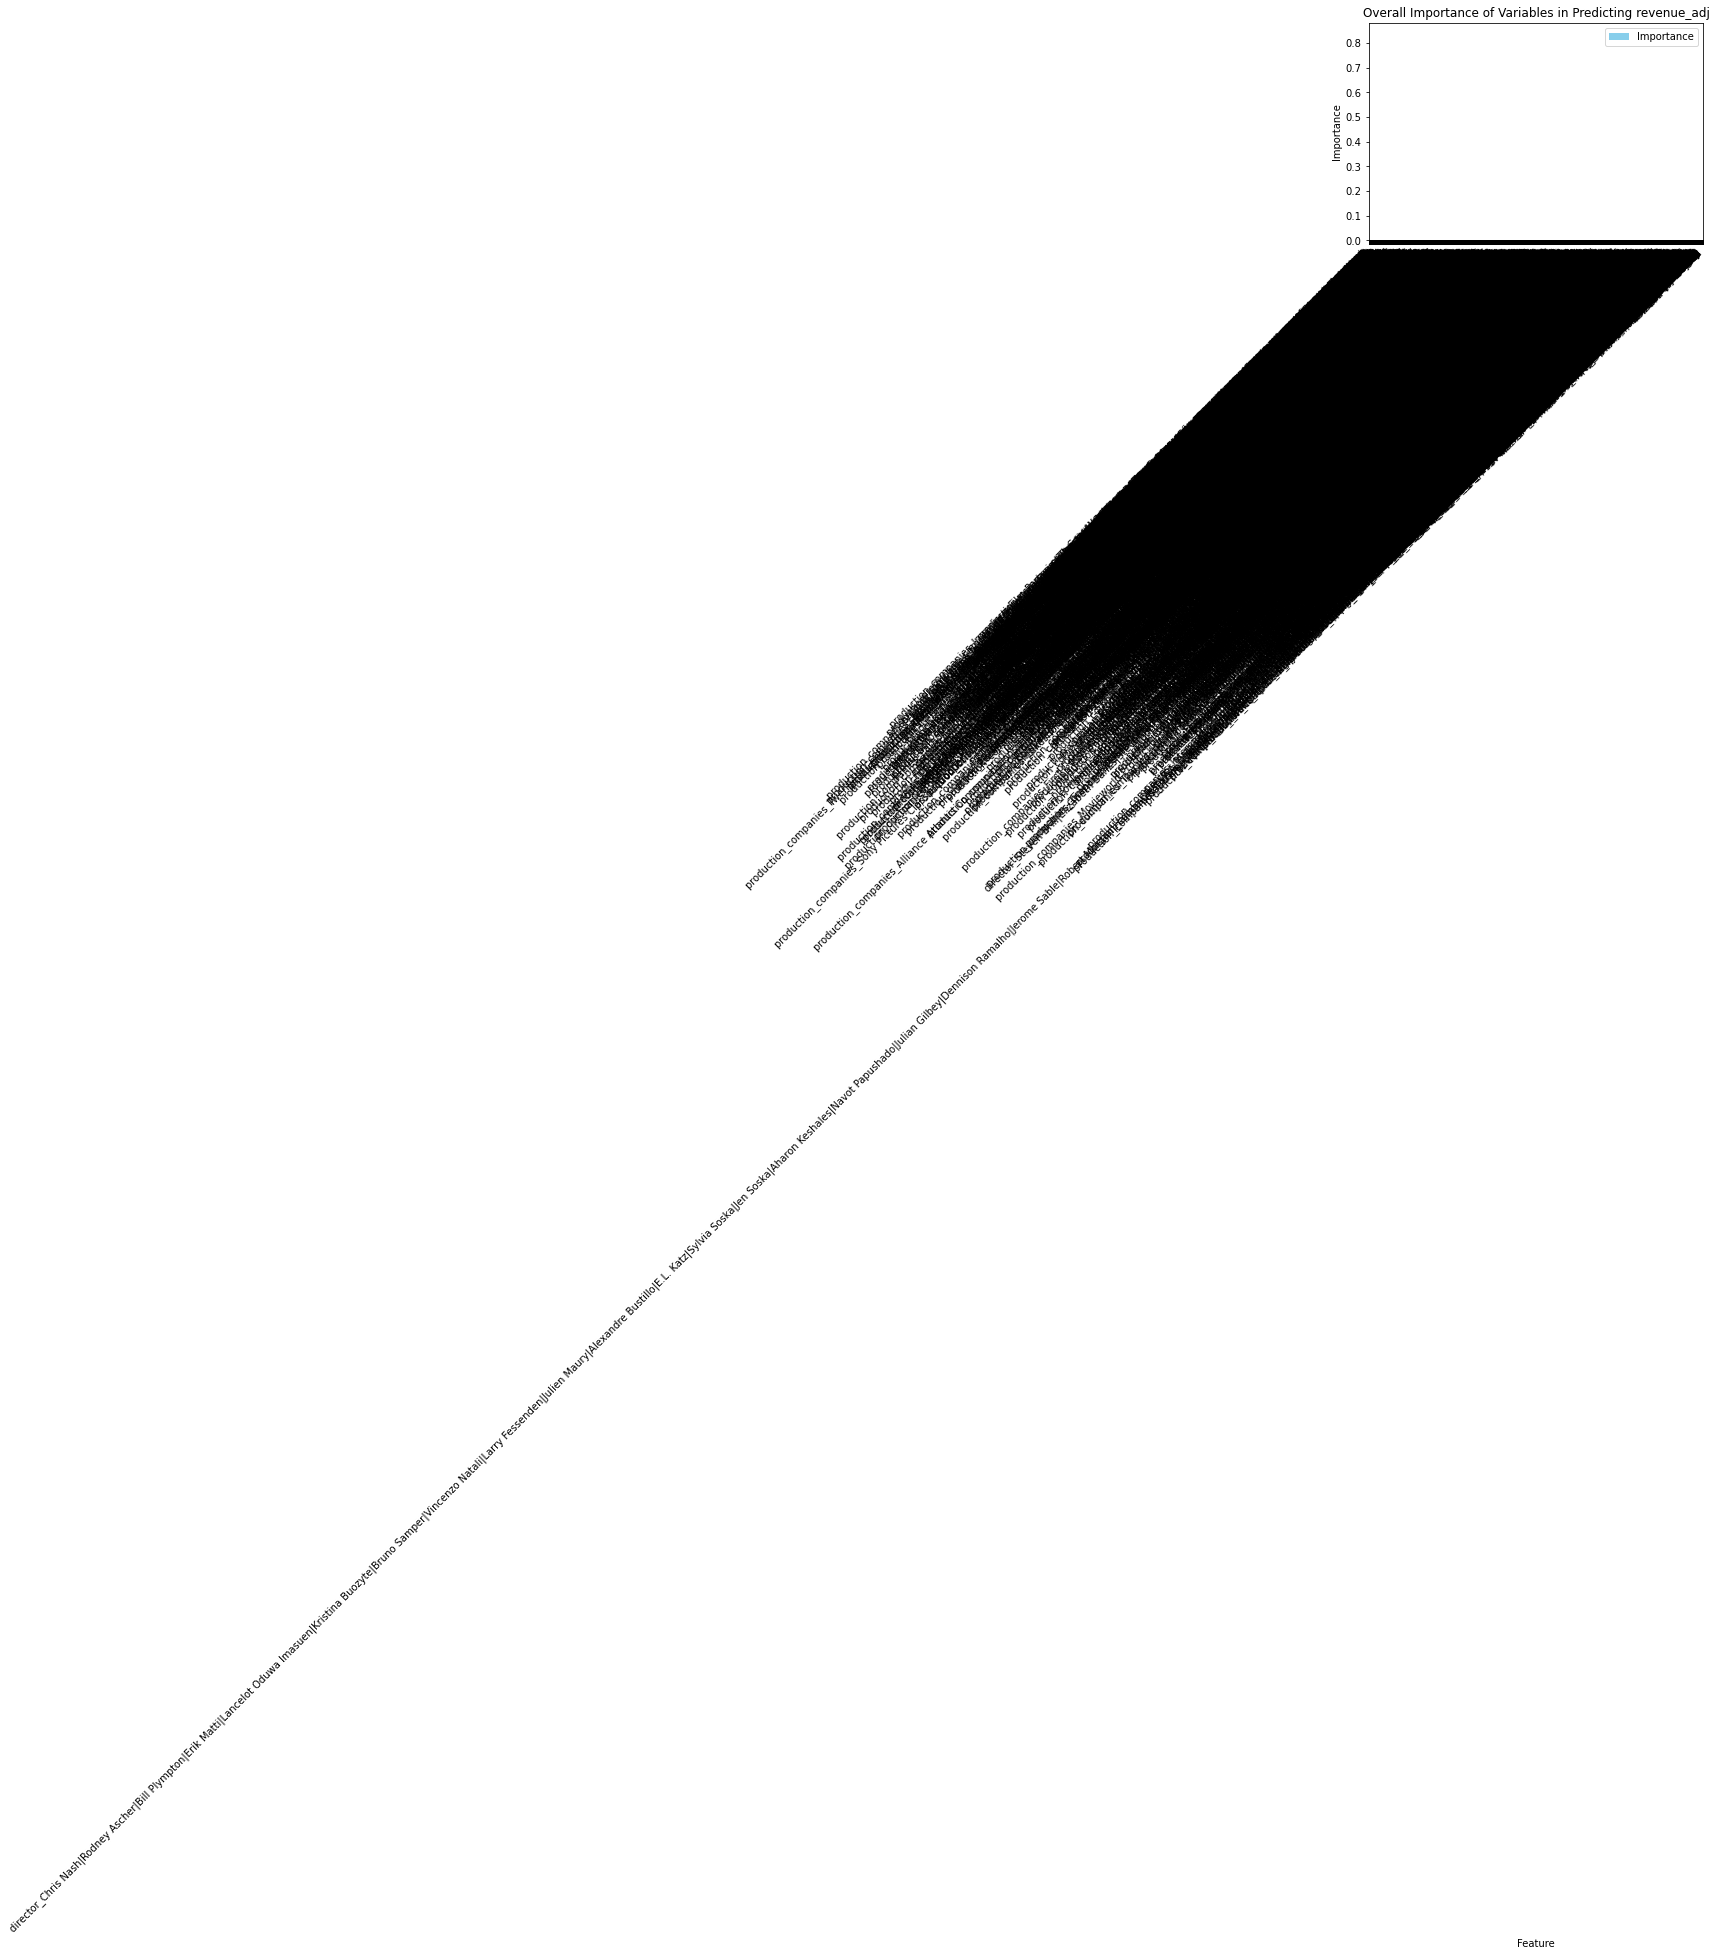

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
overall_importance.plot(kind='bar', color='skyblue')
plt.title('Overall Importance of Variables in Predicting revenue_adj')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 story telling using the data: As per our experiment can counclude that the revenue for the movie is not only depended on the 
 budjet,and directior and casts.But also season, generes, overviews and other things . to analysis the revenue ofthe movies first sentimnet analysis has done and on the basis of sentiment score movies are categorised into 9 types inorder to measure the impact of these categorised cinemas . after doing those things at last building the model is on of the important task . Random Forest Regressor with 93% of accuracy . After that some visualization had done like correlation matrix etc.